# 3rd Semester Python Notes (AG mam)

## Integration by Simpson's Rule
$$ I = \int_a^b f(x)dx = \int_{-\infty}^{\infty} \frac{dx}{1+x^2} $$
For Simpson's rule, we divide the interval [a,b] into an even number of sub-intervals.
$$ I = \frac{h}{3} [y_0 + 4(y_1+y_3+...+y_{n-1}) + 2(y_2+y_4+...+y_{n-2}) + y_n] $$

In [1]:
import numpy as np

In [2]:
def f1(x):
    return 1/(1 + x**2)
a = -10**4  # change it and see the results
b = 10**4   # change it and see the results
n = 10**6   # change it and see the results

In [3]:
h = float(b-a)/n
x0 = np.arange(a+h, b, 2*h)
xe = np.arange(a+2*h, b, 2*h)
val = h/3*(f1(a) + 4*sum(f1(x0)) + 2*sum(f1(xe)) + f1(b))
print('value of the integration is ', val)

value of the integration is  3.1413926535219634


Verification

In [4]:
import sympy as smp
x = smp.symbols('x')
y = 1/(1 + x**2)
smp.integrate(y, [x,-smp.oo, smp.oo])

pi

# Legendre Polinomials

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre as P

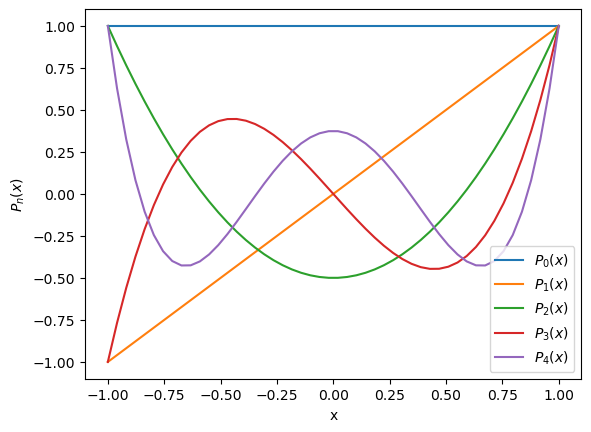

In [6]:
x = np.linspace(-1,1,50)
for i in range(5):
    plt.plot(x,P(i)(x))
    plt.legend(['$ P_0(x) $', '$ P_1(x) $', '$ P_2(x) $', '$ P_3(x) $', '$ P_4(x) $'])
    plt.xlabel('x')
    plt.ylabel('$ P_n(x) $')

## Orthogonality of Legendre Polynomial
$$ \int_{-1}^{+1} P_m(x)P_n(x) dx = \frac{2}{2n+1} \delta_{mn} $$

In [7]:
import numpy as np
from scipy.special import legendre

Define $P_m(x)P_n(x)$:

In [8]:
def pmpn(m,n):
    pm = legendre(m)
    pn = legendre(n)
    return pm*pn

Integration by **Simpson's 1/3rd Rule**:
We want to perform $ \int_a^b f(x)dx $.

In [9]:
def simp13x(f,a,b,n):
    h = float(b-a)/n
    x0 = np.arange(a+h,b,2*h)
    xe = np.arange(a+2*h,b,2*h)
    val = h/3*(f(a) + 4*sum(f(x0)) + 2*sum(f(xe)) + f(b))
    return val

Check Orthogonality for different values of $m$ and $n$.

In [10]:
for m in range(4):
    for n in range(4):
        f2 = pmpn(m,n)
        intg = simp13x(f2,-1,1,1000)  # integration

        if m==n:
            dmn = 1
        else:
            dmn = 0
        res = (2/(2*n + 1))* dmn  # result
        print(m, n, '\t', intg, '\t', res)  # compare the values of intg and res

0 0 	 2.0 	 2.0
0 1 	 1.633064054355297e-15 	 0.0
0 2 	 1.6703675479827022e-15 	 0.0
0 3 	 1.7248424910576432e-15 	 0.0
1 0 	 1.633064054355297e-15 	 0.0
1 1 	 0.6666666666666675 	 0.6666666666666666
1 2 	 1.6838382540148207e-15 	 0.0
1 3 	 1.0668277224586594e-11 	 0.0
2 0 	 1.6703675479827022e-15 	 0.0
2 1 	 1.6838382540148207e-15 	 0.0
2 2 	 0.40000000000960123 	 0.4
2 3 	 1.785978772280335e-15 	 0.0
3 0 	 1.7248424910576432e-15 	 0.0
3 1 	 1.0668277224586594e-11 	 0.0
3 2 	 1.785978772280335e-15 	 0.0
3 3 	 0.28571428581562036 	 0.2857142857142857


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:1329: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


## Bessel Functions
$$ x^2y'' + xy' + (x^2-n^2)y = 0 $$


$$ J_n(x) = \sum_{m=0}^{\infty} \frac{(-1)^m}{m! \Gamma(m+n+1)} (\frac{x}{2})^{(2m+n)} $$ 

$$ J_{-n}(x) = (-1)^n J_n(x) $$

In [11]:
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt

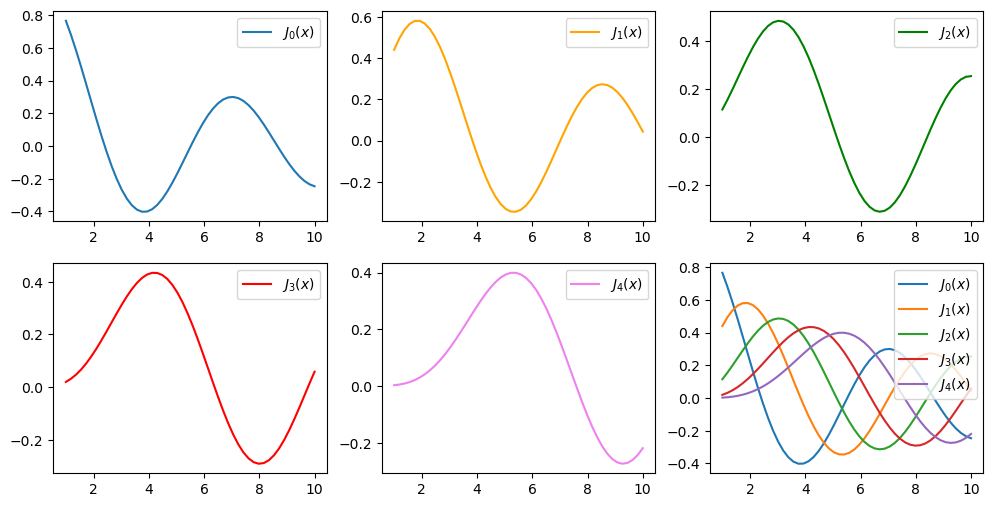

In [12]:
x = np.linspace(1,10,50)
j0 = sps.jn(0,x)
j1 = sps.jn(1,x)
j2 = sps.jn(2,x)
j3 = sps.jn(3,x)
j4 = sps.jn(4,x)
fig, axes = plt.subplots(2,3, figsize=(12,6))
ax1 = axes[0][0]
ax1.plot(x,j0, label='$J_0(x)$')
ax1.legend()
ax2 = axes[0][1]
ax2.plot(x,j1, 'orange', label='$J_1(x)$')
ax2.legend()
ax3 = axes[0][2]
ax3.plot(x,j2, 'green', label='$J_2(x)$')
ax3.legend()
ax4 = axes[1][0]
ax4.plot(x,j3, 'red', label='$J_3(x)$')
ax4.legend()
ax5 = axes[1][1]
ax5.plot(x,j4, 'violet', label='$J_4(x)$')
ax5.legend()
ax6 = axes[1][2]
ax6.plot(x,j0, label='$J_0(x)$')
ax6.plot(x,j1, label='$J_1(x)$')
ax6.plot(x,j2, label='$J_2(x)$')
ax6.plot(x,j3, label='$J_3(x)$')
ax6.plot(x,j4, label='$J_4(x)$')
ax6.legend()
plt.show()

$$ \sin(x) = 2 \sum_{n=0}^{\infty} J_{2n+1}(x) $$

In [13]:
x = np.pi/3
n = 20
s = 0
for i in range(n):
    s += ((-1)**i)*(sps.jn(2*i+1, x))
s = 2*s
print(s)

0.8660254037844388


## Square Root of Complex Numbers

$$ \sqrt{x+iy} = \sqrt{r} \cos(\theta/2) + i \sqrt{r} \sin(\theta/2) $$
where $ r = \sqrt{x^2+y^2} $ and $ \tan(\theta) = \frac{y}{x} $

In [14]:
import numpy as np

Put values of $x$ and $y$:

In [15]:
x = 3
y = 4

In [16]:
a = float(x)
b = float(y)
z2 = a**2 + b**2
r = (z2)**0.5
tn1 = np.arctan(b/a)
tn2 = tn1/2
rtr = (r)**0.5
sn = np.sin(tn2)
cs = np.cos(tn2)

In [17]:
rl = rtr * cs   # real part
img = rtr * sn  # imaginary part
print(rl, '+ i', img)

2.0 + i 1.0


## $ n^{th} $ Root of Unity

$$ x^n = 1 = e^{i(2\pi k)} $$

$$ x = e^{i(\frac{2 \pi k}{n})} = \cos(\frac{2 \pi k}{n}) + i \sin(\frac{2 \pi k}{n}) $$

In [18]:
import numpy as np

In [19]:
def croot(k,n):
    if n<=0:
        return None
    return np.exp((2*np.pi*1j*k)/n)
n = 4   # put an integer
for k in range(n):
    print(croot(k,n))

(1+0j)
(6.123233995736766e-17+1j)
(-1+1.2246467991473532e-16j)
(-1.8369701987210297e-16-1j)


## Least Square Method

We want to obtain a straight line $ y = a_0 + a_1x $ from a given datset of points $(x_i,y_i)$.

$$ a_1 = \frac{\sum x_i y_i - n\bar{x}\bar{y}}{\sum x_i^2 - n\bar{x}^2} = \frac{S_{xy}}{S_{xx}} $$

$$ a_0 = \bar{y} - a_1 \bar{x} $$

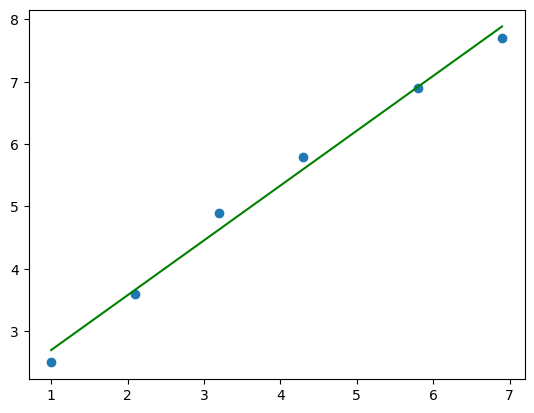

In [20]:
x = [1, 2.1, 3.2, 4.3, 5.8, 6.9]
y = [2.5, 3.6, 4.9, 5.8, 6.9, 7.7]
yfit = []
n = len(x)
xav = sum(x)/n
yav = sum(y)/n
Sxy = sum((i-xav)*(j-yav) for i,j in zip(x,y))
Sxx = sum((i-xav)**2 for i in x)
a1 = Sxy/Sxx
a0 = yav - a1*xav
yfit = [a0 + a1*i for i in x]
plt.scatter(x,y)
plt.plot(x, yfit, color='green')

## Gauss Elimination

To solve system of linear equations we use Gauss Elimination.
$$ AX = B $$
Here, we make the *Echelon* form of the matrix A. After that, we can solve the equations by *Back Substitution*. In this we make the matrix $A$ a identity matrix in $[A|B]$ by *Row Operations* and get the solution as matrix $B$ after the whole process.

In [21]:
def GaussElim(A):
    n = len(A)
    a = [[A[i][j] for j in range(len(A[0]))] for i in range(n)]
    for i in range(n-1):
        mxa = a[i][i]
        m = i
        for j in range(i+1,n):
            if abs(a[j][i])>mxa:
                mxa = abs(a[j][i])  # finding the maximum element
                m = j
        ta = a[i]
        a[i] = a[m]
        a[m] = ta

        for j in range(i+1,n):
            cf = a[j][i]/a[i][i]
            for k in range(n+1):
                a[j][k] = a[j][k] - cf*a[i][k]
                
# Back substitution
    X = [0.0 for i in range(n)]
    X[n-1] = a[n-1][n]/a[n-1][n-1]
    for i in range(n-2,-1,-1):
        sm = 0.0
        for j in range(i+1,n):
            sm += a[i][j]*X[j]
        X[i] = 1.0/a[i][i]*(a[i][n]-sm)
    return X

Put the matrix $ [A|B] $.

In [22]:
AB = [[-5,16,-4,0],[10,-5,0,12],[0,-4,11,0]]
X = GaussElim(AB)
print('X =', X)

X = [1.449056603773585, 0.49811320754716976, 0.1811320754716981]


**Question:** Solve the equations:

$$ 3x + 2y + 4z = 7 $$

$$ 2x + y + z = 4 $$

$$ x + 3y + 5z = 2 $$

**Solution:** First, define the Gauss Elimination function. Then, write the matrix $ [A|B] $.

In [23]:
AB = [[3,2,4,7],[2,1,1,4],[1,3,5,2]]
X = GaussElim(AB)
print ('[x y z] =', X)

[x y z] = [2.25, -1.124999999999999, 0.6249999999999994]


Verification

In [24]:
import numpy as np
A = np.array([[3,2,4],[2,1,1],[1,3,5]])
B = np.array([7,4,2])
np.linalg.solve(A,B)

array([ 2.25 , -1.125,  0.625])

**Alternate?**

In [25]:
def GElim(A):
    n = len(A)
    a = [[A[i][j] for j in range(len(A[0]))] for i in range(n)]
    for i in range(n):
        for j in range(i+1,n):
            c = a[j][i]/a[i][i]
            for k in range(n+1):
                a[j][k] = a[j][k] - c*a[i][k]
                
# Back substitution
    X = [0.0 for i in range(n)]
    X[n-1] = a[n-1][n]/a[n-1][n-1]
    for i in range(n-2,-1,-1):
        sm = 0.0
        for j in range(i+1,n):
            sm += a[i][j]*X[j]
        X[i] = 1.0/a[i][i]*(a[i][n]-sm)
    return X

In [26]:
AB = [[3,2,4,7],[2,1,1,4],[1,3,5,2]]
X = GElim(AB)
print ('[x y z] =', X)

[x y z] = [2.25, -1.1249999999999996, 0.6249999999999996]


In [27]:
AB = [[-5,16,-4,0],[10,-5,0,12],[0,-4,11,0]]
X = GElim(AB)
print('X =', X)

X = [1.4490566037735848, 0.49811320754716976, 0.1811320754716981]


### Inverse of a Matrix by Gauss Elimination Method

Here by Gauss Elimination we convert $[A|I]$ to $[I|A']$ where $A' = A^{-1}$.

Create the function:

In [28]:
def InvGaussElim(A):
    n = len(A)
    a = [[A[i][j] for j in range(n)] for i in range(n)]
    b = [[1.0 if i==j else 0.0 for j in range(n)] for i in range(n)]  # identity matrix
    for i in range(n):
        for j in range(n):
            if j!=i:    # operations on non-diagonal terms
                r = a[j][i]/a[i][i]
                for k in range(n):
                    a[j][k] = a[j][k] - r*a[i][k]
                    b[j][k] = b[j][k] - r*b[i][k]
    for i in range(n):
        for j in range(n):
            b[i][j] = b[i][j]/a[i][i]
    return b

Write the Matrix:

In [29]:
A = [[2,5,6,8],[7,10,5,4],[1,3,4,8],[4,8,9,12]]
invA = InvGaussElim(A)
print(" \t Inverse of the Matrix A ")
for i in invA:
    for ii in i:
        print("%0.3f,"%ii,end=" ")   # all ii in same line
    print("")

 	 Inverse of the Matrix A 
-2.500, -0.167, -0.167, 1.833, 
2.000, 0.333, 0.333, -1.667, 
-0.250, -0.250, -0.750, 0.750, 
-0.312, 0.021, 0.396, 0.021, 


Verification

In [30]:
import sympy as smp
A2 = smp.Matrix([[2,5,6,8],[7,10,5,4],[1,3,4,8],[4,8,9,12]])
A2**(-1)

Matrix([
[ -5/2, -1/6,  -1/6, 11/6],
[    2,  1/3,   1/3, -5/3],
[ -1/4, -1/4,  -3/4,  3/4],
[-5/16, 1/48, 19/48, 1/48]])